In [2]:
import os
from PIL import Image
import pickle
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection
from shapely.geometry import Polygon, MultiPolygon, Point
from plot import plot_graph_rplan, plot_polygons_rplan, plot_polygon


C:\Users\woute\AppData\Local\Temp\ipykernel_17216\3952673386.py:19: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  geo_image = pickle.load(open(os.path.join(folder_geo, name_geo),'rb'))


['0_results.png', '10_results.png', '11_results.png', '12_results.png', '13_results.png', '14_results.png', '15_results.png', '16_results.png', '17_results.png', '18_results.png', '19_results.png', '1_results.png', '20_results.png', '21_results.png', '22_results.png', '23_results.png', '24_results.png', '25_results.png', '26_results.png', '27_results.png', '28_results.png', '29_results.png', '2_results.png', '30_results.png', '31_results.png', '32_results.png', '33_results.png', '34_results.png', '35_results.png', '36_results.png', '37_results.png', '38_results.png', '39_results.png', '3_results.png', '40_results.png', '41_results.png', '42_results.png', '43_results.png', '44_results.png', '45_results.png', '46_results.png', '47_results.png', '48_results.png', '49_results.png', '4_results.png', '5_results.png', '6_results.png', '7_results.png', '8_results.png', '9_results.png']


C:\Users\woute\AppData\Local\Temp\ipykernel_17216\3952673386.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


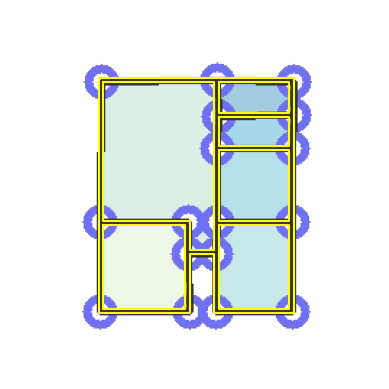

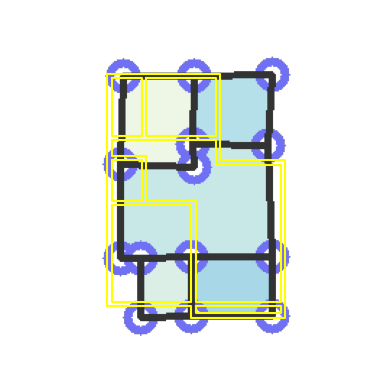

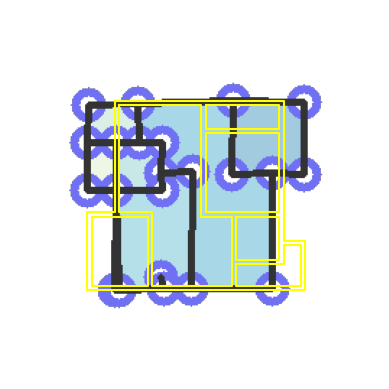

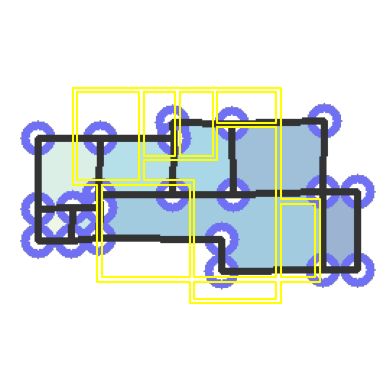

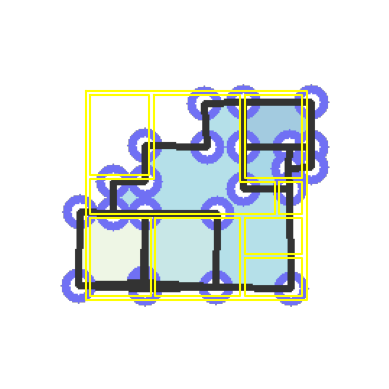

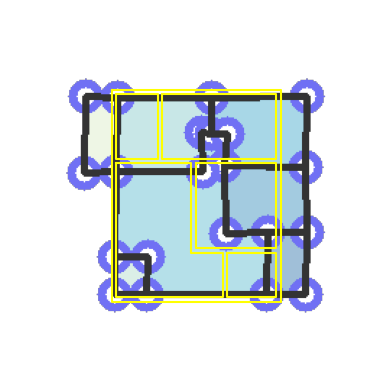

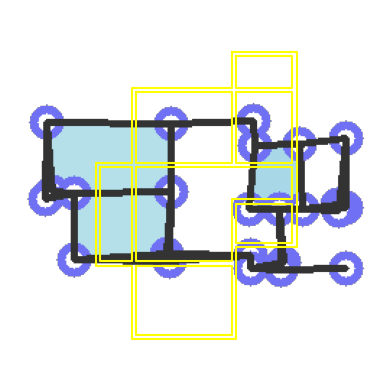

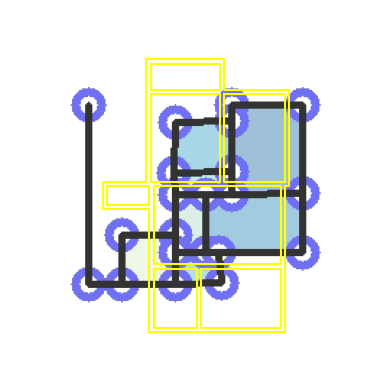

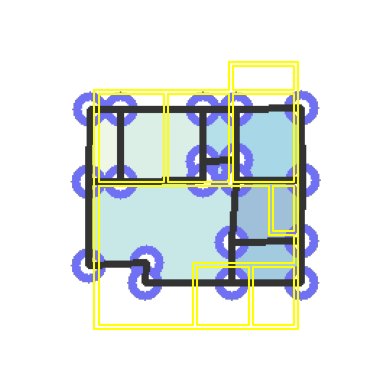

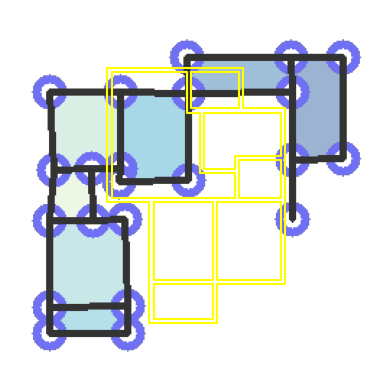

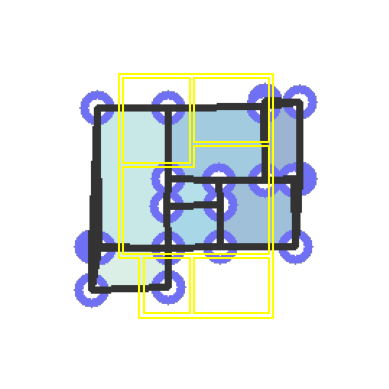

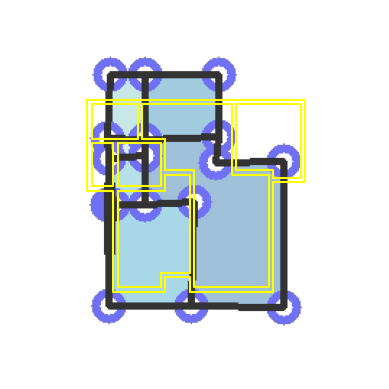

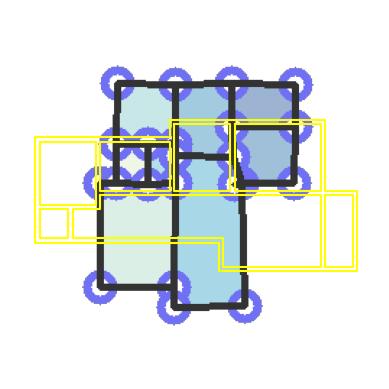

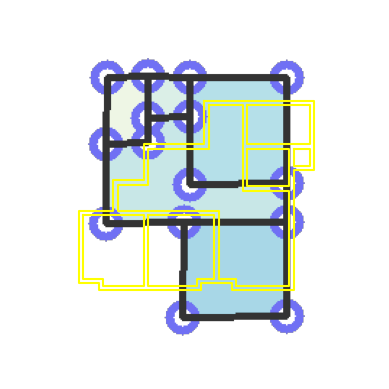

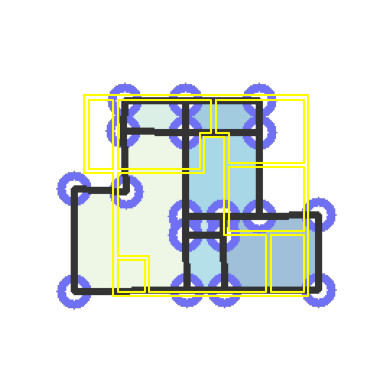

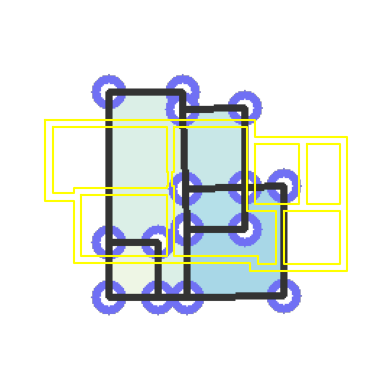

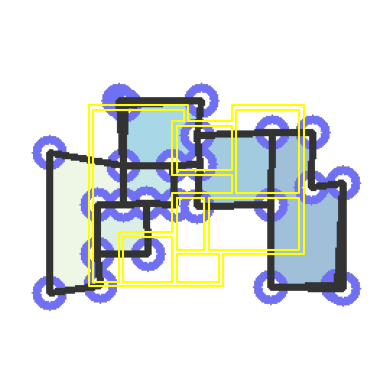

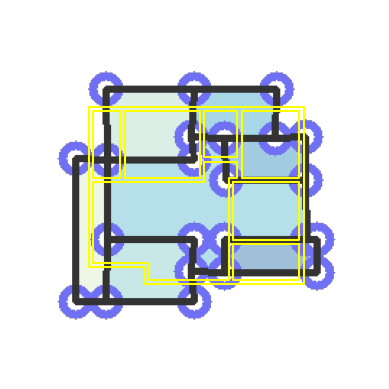

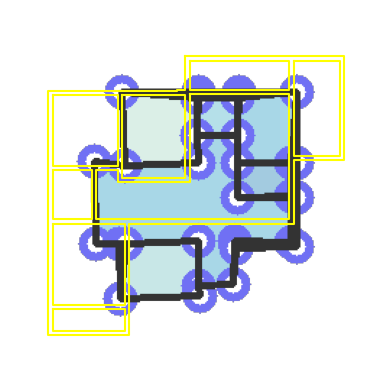

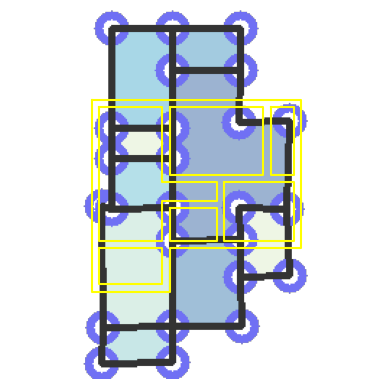

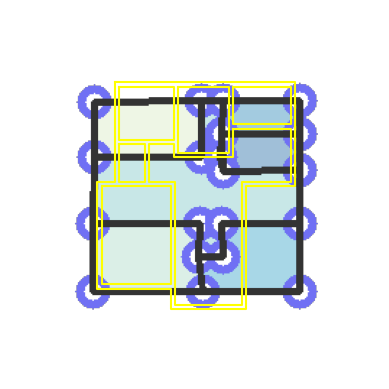

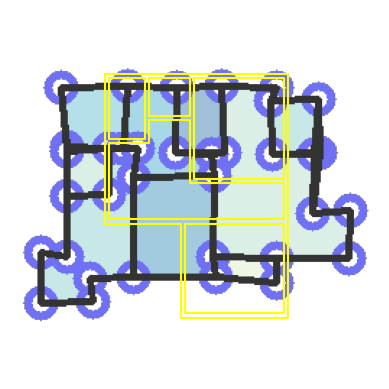

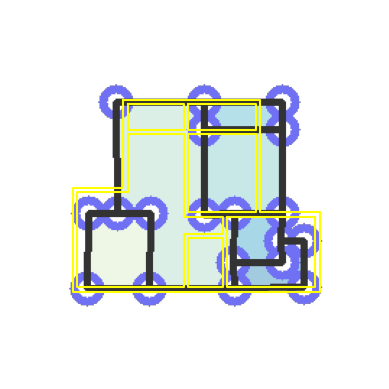

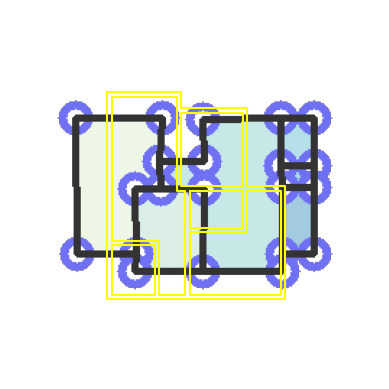

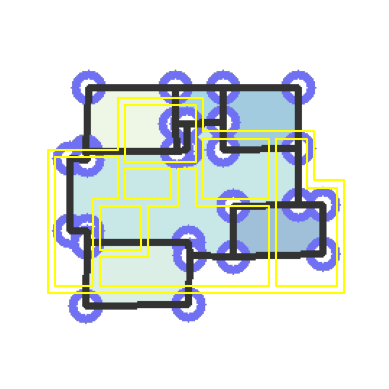

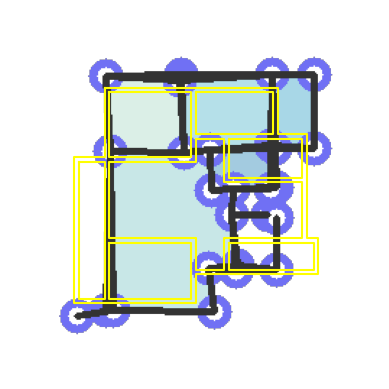

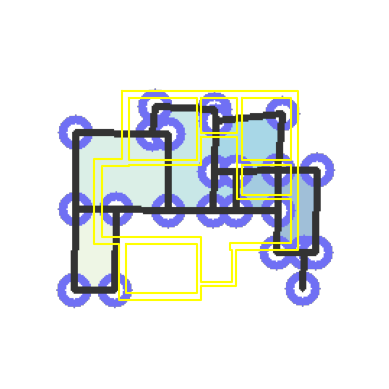

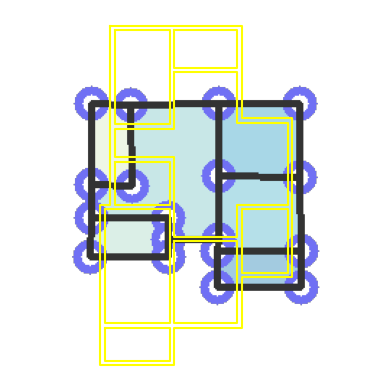

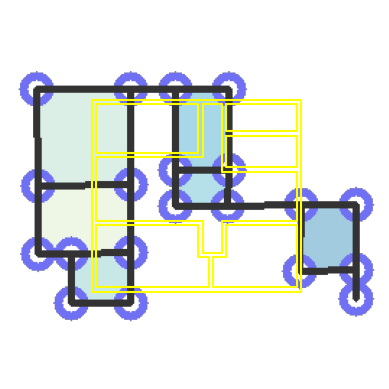

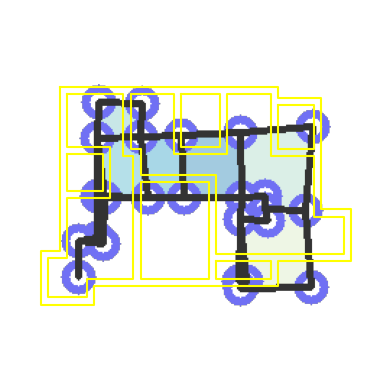

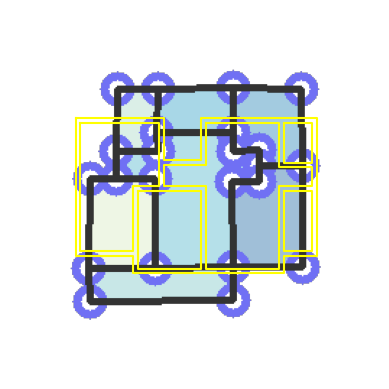

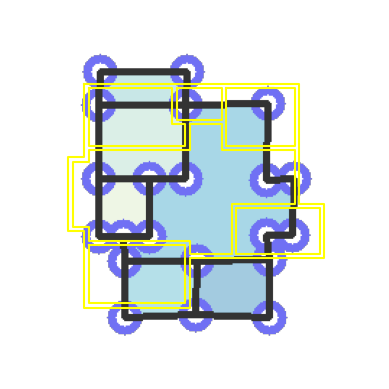

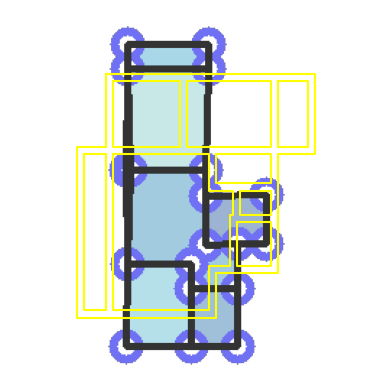

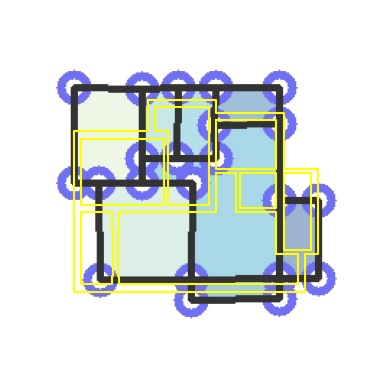

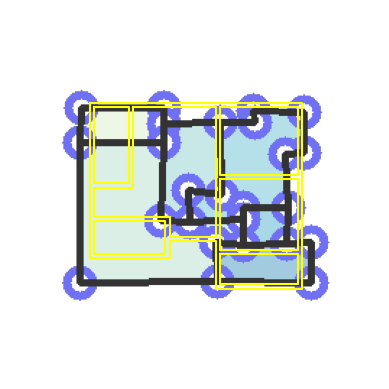

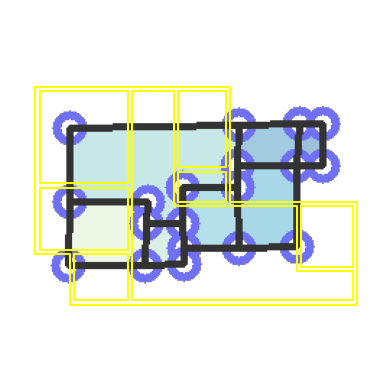

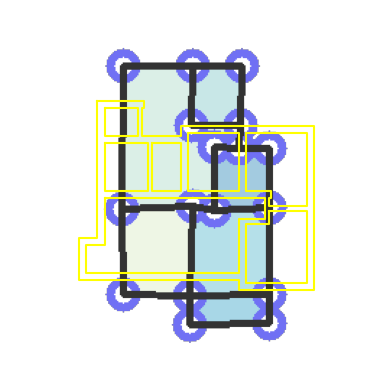

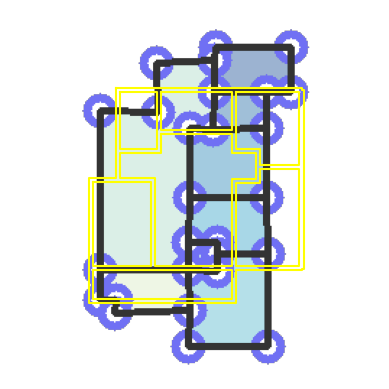

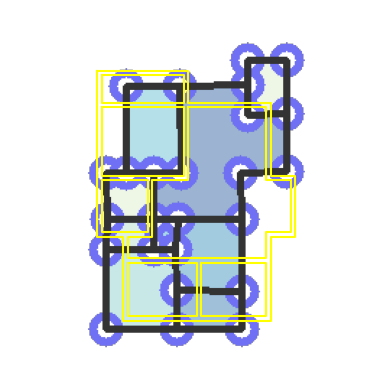

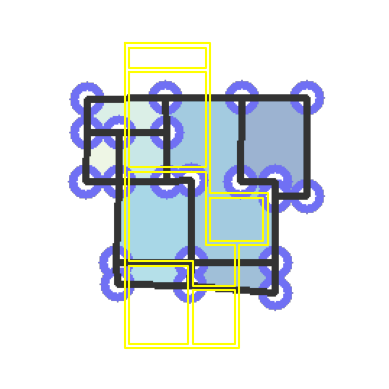

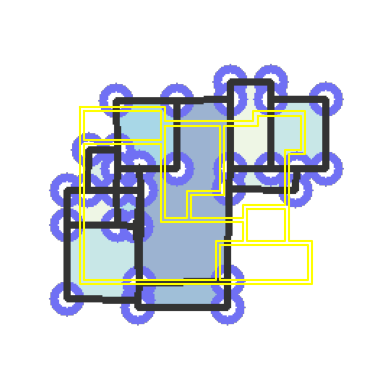

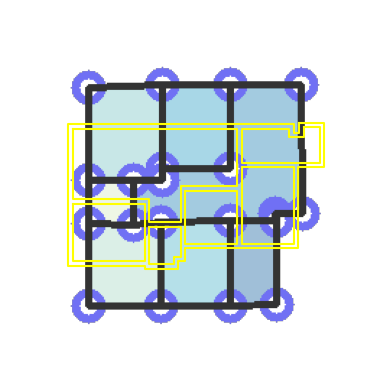

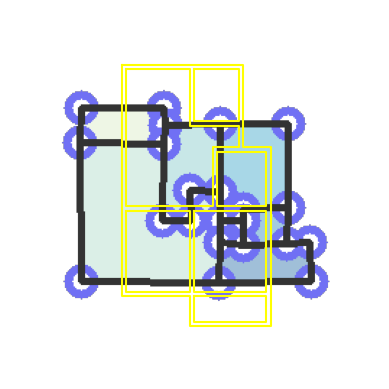

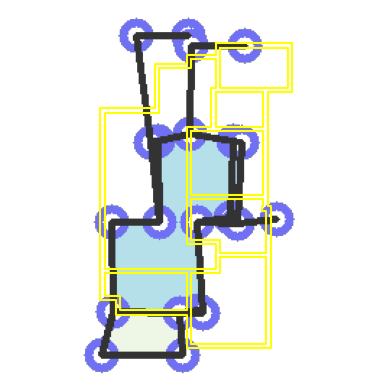

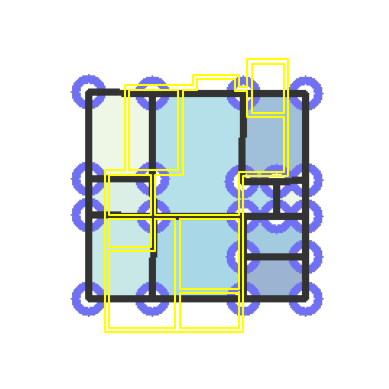

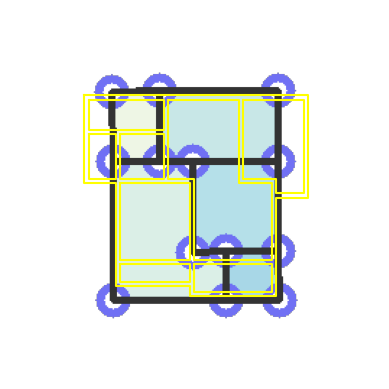

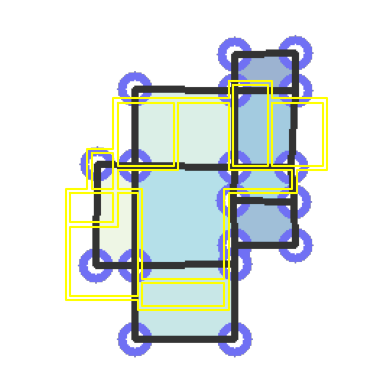

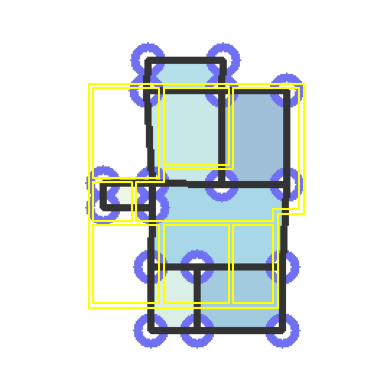

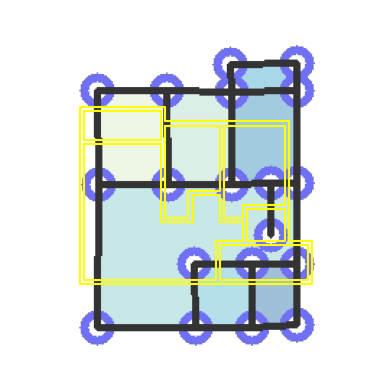

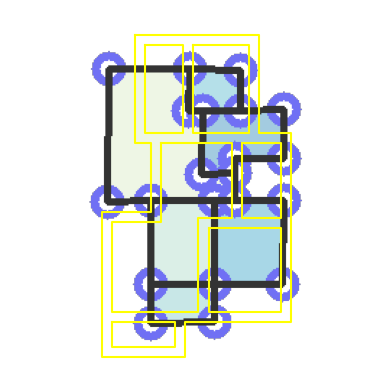

In [30]:
folder_vis = r"..\heat\results\visualize_heat_RPLAN_small"
folder_geo = r"..\heat\data\RPLAN_small\geometry"
folder_max = r"..\heat\data\RPLAN_small\max"  
folder_input_output = r"..\heat\results\input_output"
folder_output_gt = r"..\heat\results\output_gt"

vis_list = os.listdir(folder_vis)
geo_list = os.listdir(folder_geo)
max_list = os.listdir(folder_max)

print(vis_list)

for nr, name_vis in enumerate(vis_list):
    name_geo = geo_list[nr]
    name_max = max_list[nr]
    
    vis_image = Image.open(os.path.join(folder_vis, name_vis))
    max_image = Image.open(os.path.join(folder_max, name_max))
    geo_image = pickle.load(open(os.path.join(folder_geo, name_geo),'rb'))
    geo_wall = geo_image[0][2]

    # Create The Max image with the vis_results as overlay
    max_image.paste(vis_image, (0,0), vis_image)
    max_image.save(os.path.join(folder_input_output, name_vis))

    # Create the vis_results with the GT polygon as overlay
    fig, ax = plt.subplots()
    ax.imshow(vis_image, alpha=0.8)
    ax.axis('off')
    for key in geo_wall.keys():
        plot_polygon(ax,geo_wall[key],c='yellow')
    fig.savefig(os.path.join(folder_output_gt, name_vis))

    